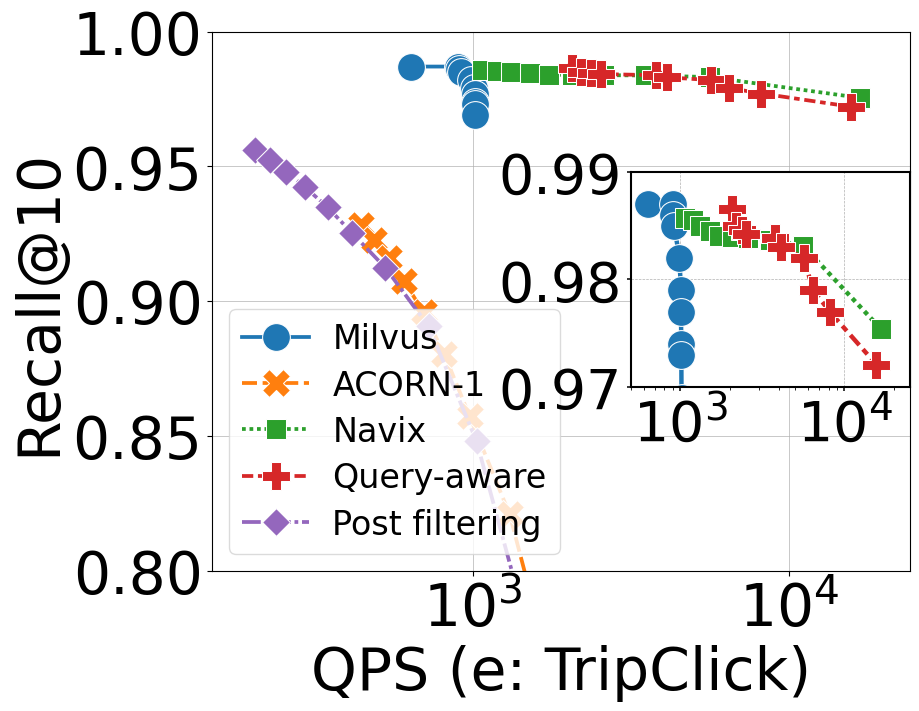

In [50]:
# Trip Click Plot with Working Legend

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# -------------------------------
# Helper function
# -------------------------------
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(
            metrics["Value"], metrics["Time"], metrics["Recall"]
        ):
            rows.append({
                "Category": category,
                "Value": value,
                "Time": time,
                "Recall": recall
            })
    return pd.DataFrame(rows)

# -------------------------------
# Data
# -------------------------------
schemes = {
    "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1018.3, 1015.9, 1014.3, 1011.1, 1010.5, 988.2, 919.0, 903.5, 899.8, 635.9],
        "Recall": [0.969, 0.973, 0.974, 0.977, 0.979, 0.982, 0.985, 0.986, 0.987, 0.987]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4803, 1898.05, 1305.79, 976.261, 811.796, 698.071, 605.344, 543.929, 487.062, 443.271],
        "Recall": [0.5010, 0.7480, 0.8208, 0.8572, 0.8803, 0.8958, 0.9074, 0.9161, 0.9225, 0.9281]
    },
    "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [16704.7, 5626.37, 3506.85, 2600.3, 2059.95, 1733.83, 1519.29, 1320.1, 1191.67, 1069.68],
        "Recall": [0.9754, 0.9831, 0.9837, 0.9838, 0.9839, 0.9840, 0.9845, 0.9850, 0.9855, 0.9857]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    },
    "Post filtering": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [2783, 1026, 724, 529, 415, 347, 295, 257, 228, 204],
        "Recall": [0.6608, 0.8480, 0.8906, 0.9123, 0.9252, 0.9348, 0.9422, 0.9478, 0.9524, 0.9561]
    }
}

df = flatten_schemes(schemes)

# -------------------------------
# Figure setup
# -------------------------------
fig, ax = plt.subplots(figsize=(9, 7))

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20
# -------------------------------
# Main plot (legend ON)
# -------------------------------
sns.lineplot(
    data=df,
    x="Time",
    y="Recall",
    hue="Category",
    style="Category",
    markers=True,
    dashes=True,
    linewidth=LINE_WIDTH,
    markersize=MARKER_SIZE,
    ax=ax
)

ax.set_xscale("log")
ax.set_xlabel("QPS (e: TripClick)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_xlim(150, 2.4e4)
ax.set_ylim(0.8, 1.0)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f"{y:.2f}")
)

ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7)

# Legend customization
ax.legend(
    loc='lower left',
    fontsize=24,
    frameon=True,
    edgecolor='lightgrey',
    labelspacing=0.4,
    handletextpad=0.7
)

# -------------------------------
# Inset plot (legend OFF)
# -------------------------------
axins = inset_axes(
    ax,
    width="40%",
    height="40%",
    bbox_to_anchor=(0.60, 0.34, 1, 1),
    bbox_transform=ax.transAxes,
    loc='lower left',
    borderpad=0
)

sns.lineplot(
    data=df,
    x="Time",
    y="Recall",
    hue="Category",
    style="Category",
    markers=True,
    dashes=True,
    linewidth=LINE_WIDTH + 0.5,
    markersize=MARKER_SIZE,
    ax=axins,
    legend=False
)

axins.set_xscale("log")
axins.set_xlim(500, 2.5e4)
axins.set_ylim(0.97, 0.99)

axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.1, length=3)

axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f"{y:.2f}")
)

axins.set_xlabel("")
axins.set_ylabel("")

# Inset border
for spine in axins.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(1.5)

# -------------------------------
# Save & show
# -------------------------------
plt.savefig(
    "/data3/Adeel/Query-AwareResult/TripClickPoint.pdf",
    format="pdf",
    bbox_inches="tight"
)

plt.show()


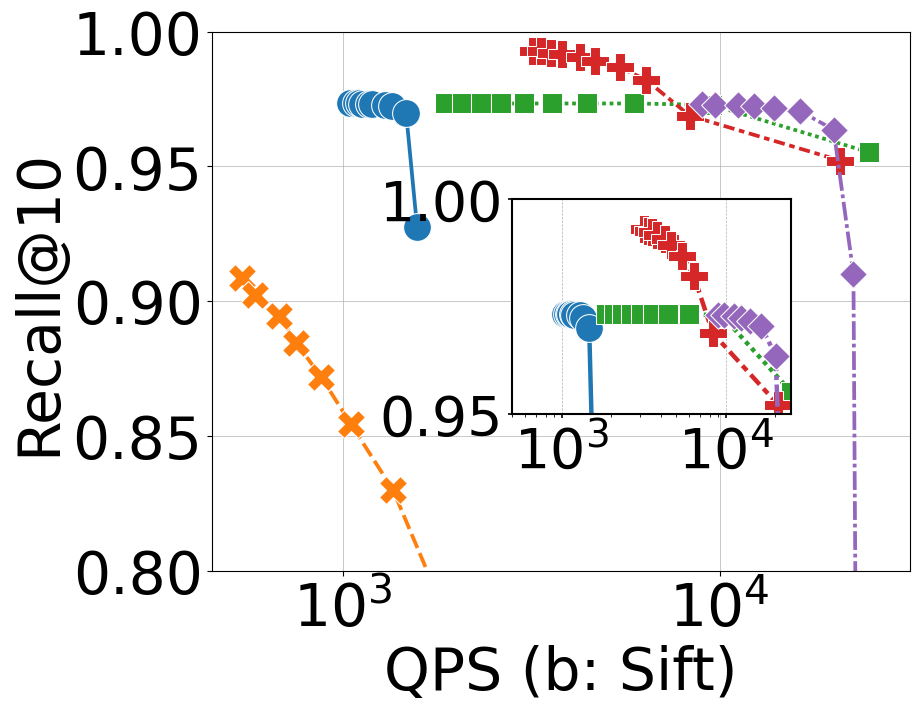

In [51]:
#Sift 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1573.84, 1471.59, 1348.19, 1297.04, 1196.76, 1171.55, 1124.75, 1106.69, 1083.48, 1043.29],
        "Recall": [0.9275, 0.9699, 0.9724, 0.9729, 0.9731, 0.9732, 0.9732, 0.9733, 0.9733, 0.9733]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6688.96, 2816.9, 1816.2, 1358.33, 1050.64, 875.58, 752.445, 678.518, 585.789, 538.793],
        "Recall": [0.4415, 0.7054, 0.7881, 0.8299, 0.8543, 0.8718, 0.8845, 0.8944, 0.9022, 0.9085]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [24937.7, 9523.81, 5934.72, 4440.5, 3586.8, 3022.97, 2626.74, 2329.92, 2069.54, 1862.89],
        "Recall": [0.9552, 0.9728, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733] 
    },

     "Query-aware":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [20921, 8328, 6378, 5435, 4661, 4252, 3811, 3574, 3350, 3188],
        "Recall": [0.9521, 0.9688, 0.9821, 0.9867, 0.9892, 0.9906, 0.9915, 0.9922, 0.9926, 0.9929]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [23980, 23309, 22675, 20080, 16393, 13966, 12363, 11173, 9756, 8960],
        "Recall": [0.1641, 0.6422, 0.9101, 0.9636, 0.9704, 0.9717, 0.9723, 0.9727, 0.9729, 0.9730]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9, 7))

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (b: Sift)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(450, 3.2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.43, 0.29, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.95, 1)
axins.set_xlim(500, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/SIFT.pdf", format="pdf", bbox_inches="tight")

plt.show()


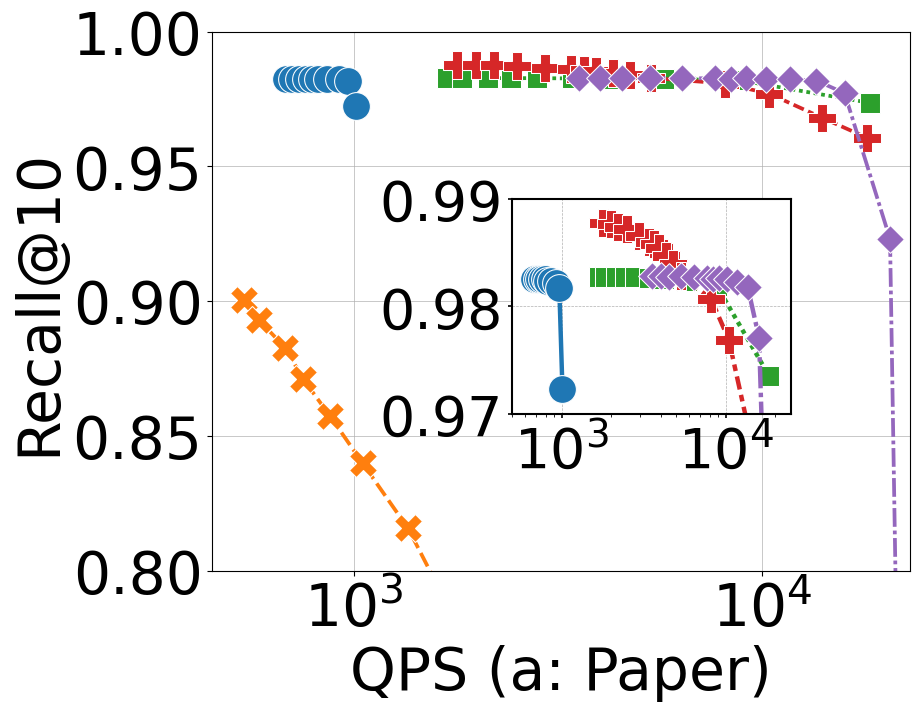

In [52]:
#PAPER

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1011.7, 967.7, 919.9, 860.8, 816.9, 788.2, 764.5, 732.3, 705.6, 680.9],
        "Recall": [0.9723, 0.9817, 0.9822, 0.9824, 0.9824, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6688.96, 2816.9, 1816.2, 1358.33, 1050.64, 875.58, 752.445, 678.518, 585.789, 538.793],
        "Recall": [0.4802, 0.7085, 0.7784, 0.8156, 0.8398, 0.8572, 0.8709, 0.8827, 0.8929, 0.9004]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [18421.5, 8818.34, 5760.37, 4215.85, 3417.63, 2809.78, 2422.48, 2131.29, 1843.32, 1694.63],
        "Recall": [0.9735, 0.9819, 0.9824, 0.9825, 0.9826, 0.9827, 0.9827, 0.9827, 0.9827, 0.9827] 
    },

     "Query-aware":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [18055, 14030, 10423, 8124, 5333, 4759, 4310, 3922, 3668, 3412, 2942, 2513, 2209, 1988, 1786],
        "Recall": [0.9606, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854, 0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876, 0.9877]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [24814, 25380, 20576, 15924, 13587, 11696, 10204, 9115, 8380, 7671, 6356, 5315, 4530, 4016, 3563],
        "Recall": [0.1643, 0.6457, 0.9230, 0.9771, 0.9818, 0.9823, 0.9825, 0.9826, 0.9825, 0.9826, 0.9827, 0.9828, 0.9827, 0.9828, 0.9828]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9, 7))

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (a: Paper)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(450, 2.3e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.43, 0.29, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.97, 0.99)
axins.set_xlim(500, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/Paper.pdf", format="pdf", bbox_inches="tight")

plt.show()



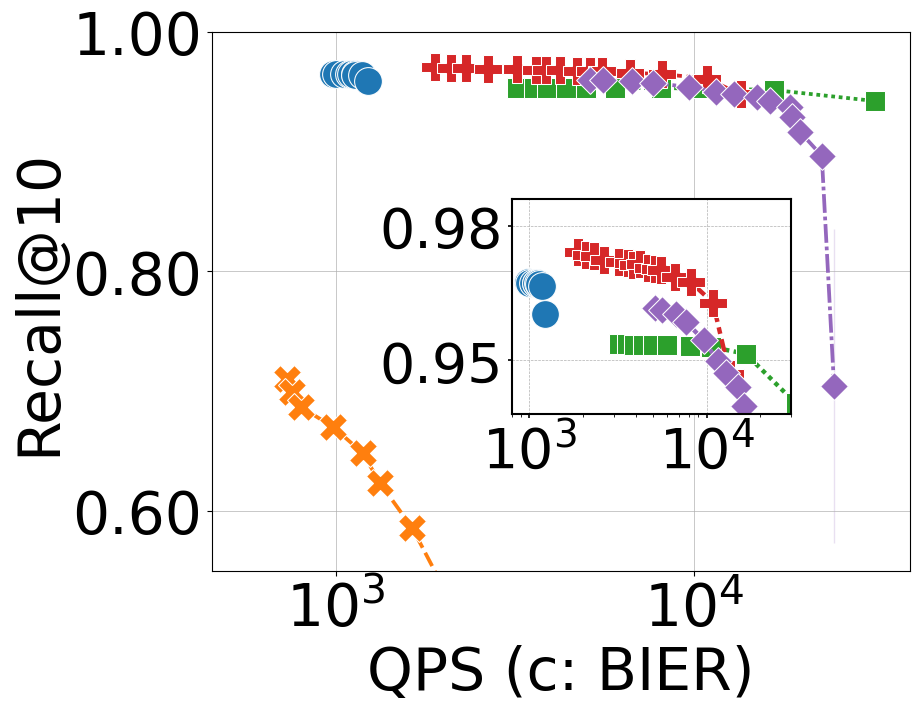

In [53]:

#BIER

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1226.5, 1181.1,  1127.8, 1127.1, 1098.6, 1098.6, 1086.6, 1053.6, 996.7, 977.7],
        "Recall": [0.9586, 0.9638, 0.9641, 0.9643, 0.9644, 0.9644, 0.9644, 0.9644, 0.9644, 0.9645]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6172.84, 3311.26, 2060.44, 1632.21, 1327.43, 1184.83, 981.033, 797.024, 752.257, 727.802],
        "Recall": [0.229, 0.4369, 0.5274, 0.5853, 0.6227, 0.6482, 0.6697, 0.6865, 0.6987, 0.7101]
    },

   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [31914.9, 16666.7, 10563.4, 8064.52, 6000, 5000, 4373.18, 3886.01, 3562.95, 3191.49],
        "Recall": [0.942, 0.9512, 0.9525, 0.9527, 0.9529, 0.9529, 0.9529, 0.9529, 0.953, 0.953] 
    },

     "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [13494, 10870, 8152, 6617, 5535, 5119, 4702, 4225, 3846, 3614, 3191, 2655, 2308, 2087, 1883],
        "Recall": [0.9475, 0.9607, 0.9645, 0.9655, 0.9668, 0.9669, 0.9672, 0.9679, 0.9676, 0.9681, 0.9683, 0.9686, 0.9694, 0.9695, 0.9701]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 24590, 24590, 22727, 19737, 18750,18519, 16304, 15000, 12931, 11538, 9677, 7653, 6696, 5576, 5119],
        "Recall": [0.5733, 0.8353, 0.8963, 0.9163, 0.9287, 0.9367, 0.9416, 0.945, 0.9477, 0.9499, 0.9537, 0.9571, 0.9585, 0.9593, 0.9597]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9, 7))

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (c: BIER)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.55, 1.0)
ax.set_xlim(450, 4e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.43, 0.29, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.94, 0.98)
axins.set_xlim(800, 3e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/BIER.pdf", format="pdf", bbox_inches="tight")

plt.show()




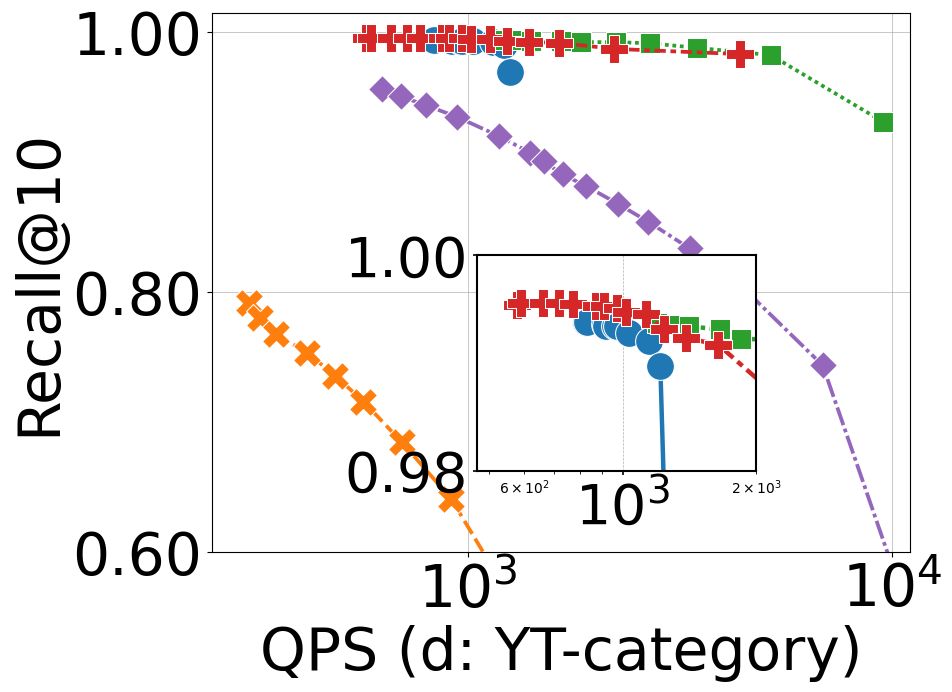

In [54]:

#YOUTUBE CATEGORY

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1257.7, 1215.9, 1148.4, 1031.1, 970.7, 958.7, 919.3, 910.2, 832.4, 827.0],
        "Recall": [0.9693, 0.9897, 0.992, 0.9928, 0.9934, 0.9934, 0.9934, 0.9936, 0.9938, 0.9938]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [3213.3, 1283.19, 915.549, 700.483, 568.071, 487.19, 419.227, 352.691, 324.203, 304.622],
        "Recall": [0.3329, 0.5604, 0.6403, 0.684, 0.7155, 0.7354, 0.7528, 0.7676, 0.7798, 0.7915]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9508.2, 5178.57, 3473.05, 2691.42, 2239.38, 1847.13, 1654.78, 1407.77, 1290.32, 1192.19],
        "Recall": [0.931, 0.9822, 0.9878, 0.9913, 0.9922, 0.9922, 0.9931, 0.9934, 0.9935, 0.9937] 
    },

     "Query-aware":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4377, 2214, 1641, 1391, 1237, 1126, 1019, 969, 906, 870, 771, 720, 660, 591, 577],
        "Recall": [0.983, 0.987, 0.9917, 0.9923, 0.9931, 0.9945, 0.9947, 0.9951, 0.9953, 0.9953, 0.9955, 0.9956, 0.9956, 0.9956, 0.9954]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        
        "Time": [ 12083, 6864, 4414, 3333, 2661, 2257, 1896, 1674, 1510, 1406, 1186, 946, 797, 695, 628],
        "Recall": [0.5114, 0.7433, 0.8043, 0.8334, 0.854, 0.8678, 0.8816, 0.8903, 0.9003, 0.9069, 0.9198, 0.9345, 0.9436, 0.9504, 0.9564]
    }
}


df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9, 7))

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (d: YT-category)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.6, 1.015)
ax.set_xlim(250, 11e3)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.38, 0.15, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.98, 1)
axins.set_xlim(470, 2e3)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/YoutubeCategory.pdf", format="pdf", bbox_inches="tight")

plt.show()








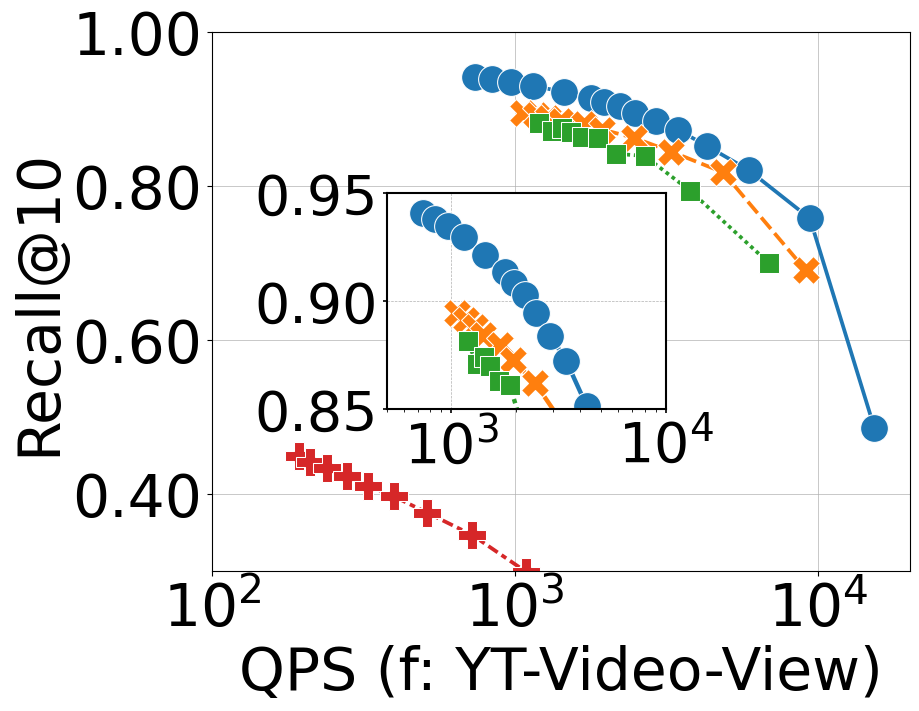

In [55]:
# Range Search Results
# VIDEO VIEWS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
    "Proposed PF": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [15306, 9375, 5882, 4286, 3440, 2907, 2488, 2210, 1961, 1779, 1445, 1144, 967, 840, 736],
        "Recall": [0.4849, 0.7572, 0.8202, 0.8514, 0.8723, 0.8838, 0.8944, 0.9027, 0.9085, 0.9133, 0.9215, 0.9295, 0.9349, 0.9381, 0.9409]
    },
    "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [9090.91, 4854.37, 3267.97, 2471.17, 1937.98, 1683.50, 1413.76, 1286.45, 1171.88, 1063.83],
        "Recall": [0.6898, 0.8170, 0.8441, 0.8618, 0.8727, 0.8797, 0.8841, 0.8881, 0.8913, 0.8945]
    },
    "Query-aware naive":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [6849.77, 3783.62, 2669.18, 2155.17, 1875.00, 1665.93, 1522.01, 1431.30, 1320.42, 1196.81],
        "Recall": [0.6997, 0.7929, 0.8385, 0.8411, 0.8612, 0.8627, 0.8697, 0.8741, 0.871, 0.8813]
    },
    "ACORN-1":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [2293.58, 1086.17, 719.08, 510.38, 397.14, 327.80, 278.24, 240.15, 209.85, 193.35],
        "Recall": [0.1851, 0.2983, 0.3464, 0.3753, 0.3963, 0.4101, 0.4225, 0.4332, 0.4410, 0.4482]
    }
}



df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9,7))

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (f: YT-Video-View)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.3, 1)
ax.set_xlim(100, 2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.25, 0.30, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.85,0.95)
axins.set_xlim(500, 1e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/YT-Video-View-Range.pdf", format="pdf", bbox_inches="tight")

plt.show()



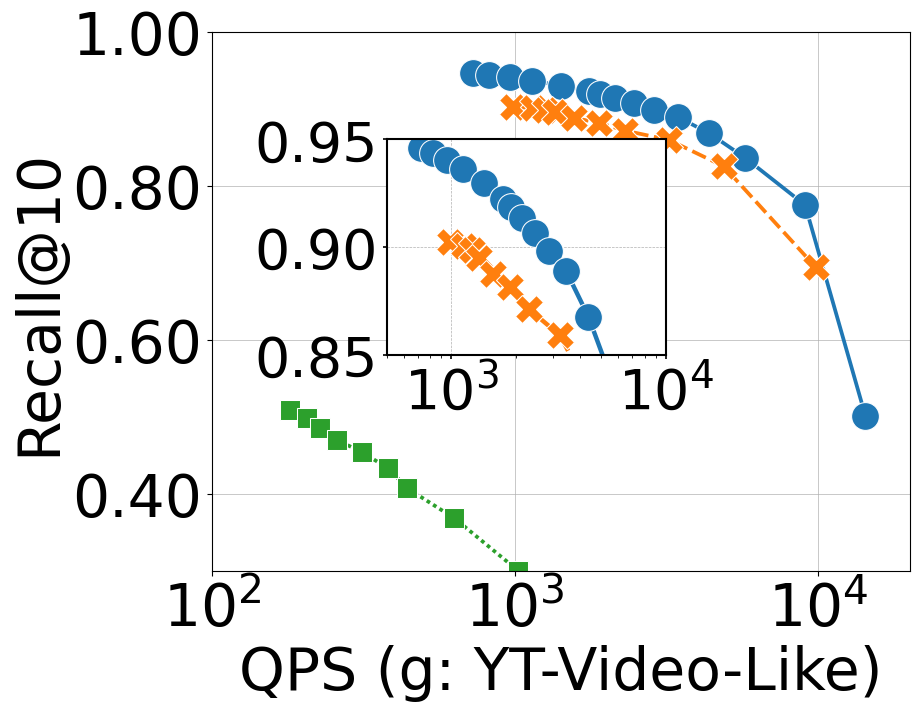

In [56]:
# Range Search Results
# VIDEO Like

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.71, 9036.14, 5725.19, 4370.55, 3448.28, 2873.56, 2464.00, 2139.80, 1909.93, 1747.09, 1416.43, 1138.10, 960.30, 821.92, 727.19],
        "Recall": [0.5011, 0.7747, 0.8361, 0.8677, 0.8887, 0.8984, 0.9067, 0.9135, 0.9184, 0.9225, 0.9297, 0.9362, 0.9406, 0.9435, 0.9461]
    },

    "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9803.92, 4870.13, 3218.88, 2304.15, 1886.79, 1565.76, 1350.14, 1257.33, 1144.16, 983.61],
        "Recall": [0.6938, 0.8250, 0.8591, 0.8713, 0.8815, 0.8877, 0.8951, 0.8985, 0.9003, 0.9025]
    },

     "ACORN-1 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [2392.34, 1023.19, 629.723, 440.788, 380.904, 313.022, 258.665, 227.514, 205.677, 181.181],
        "Recall": [0.1515, 0.2996, 0.3679, 0.4067, 0.4328, 0.4533, 0.4695, 0.4847, 0.4983, 0.5085]
    }
}


df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9,7))

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (g: YT-Video-Like)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.3, 1)
ax.set_xlim(100, 2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.25, 0.40, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.85,0.95)
axins.set_xlim(500, 1e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/YT-Video-Like-Range.pdf", format="pdf", bbox_inches="tight")

plt.show()




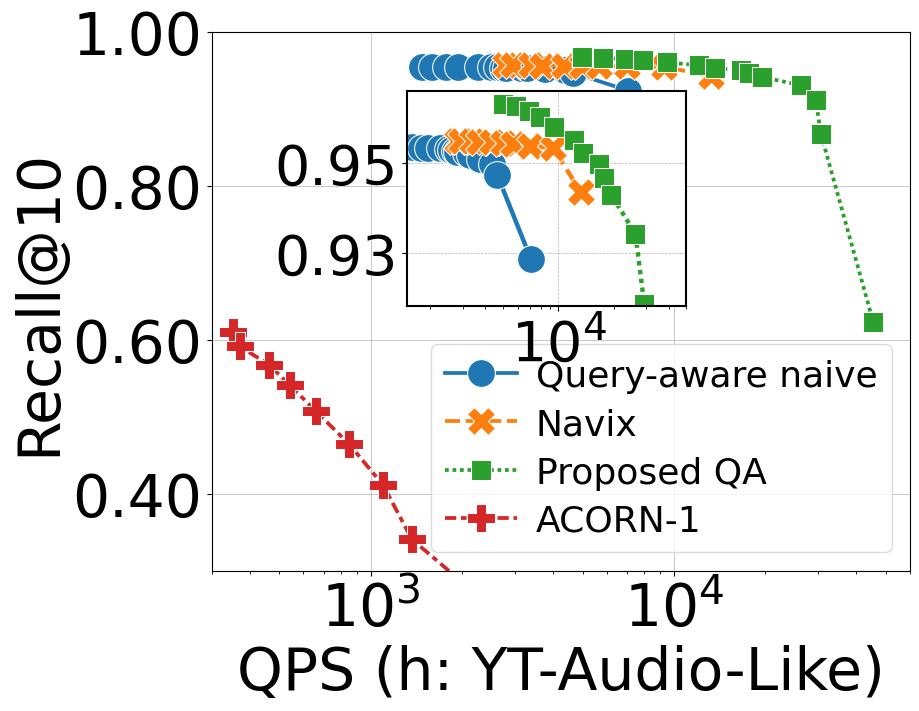

In [57]:
# Range Search Results
# Audio Like

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# =========================
# Flatten helper
# =========================
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(
            metrics["Value"], metrics["Time"], metrics["Recall"]
        ):
            rows.append({
                "Category": category,
                "Value": value,
                "Time": time,
                "Recall": recall
            })
    return pd.DataFrame(rows)

# =========================
# Data
# =========================
schemes = {
    "Query-aware naive": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7064.71, 4643.97, 4360.47, 3750.00, 3280.35, 3138.91, 2803.74, 2737.23, 2604.17, 2500.00, 2259.04, 1935.48, 1771.78, 1593.56, 1479.37],
        "Recall": [0.9233, 0.9465, 0.9497, 0.9511, 0.9521, 0.9527, 0.9529, 0.9532, 0.9536, 0.9537, 0.9540, 0.9541, 0.9541, 0.9543, 0.9544],
    },

    "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [13274, 9317, 7009, 5682, 4967, 4360, 3667, 3386, 2953, 2783],
        "Recall": [0.9419, 0.9541, 0.9547, 0.9552, 0.9556, 0.9558, 0.9558, 0.9559, 0.9560, 0.9560],
    },

    "Proposed QA": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [45454, 30612, 29412, 26316, 19481, 17647, 16667, 13636, 12097, 12097, 9494, 7895, 6881, 5837, 4967],
        "Recall": [0.6233, 0.8663, 0.9107, 0.9302, 0.9410, 0.9457, 0.9495, 0.9526, 0.9551, 0.9574, 0.9599, 0.9626, 0.9643, 0.9657, 0.9663],
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4615, 2517, 1366, 1100, 846, 660, 542, 462, 370, 352],
        "Recall": [0.1079, 0.2517, 0.3408, 0.4109, 0.4648, 0.5068, 0.5404, 0.5673, 0.5911, 0.6093],
    },
}

df = flatten_schemes(schemes)

# =========================
# Plot configuration
# =========================
LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LINE_WIDTH = 2.7
MARKER_SIZE = 20

fig, ax = plt.subplots(figsize=(9,7))

# =========================
# Main plot (LEGEND ENABLED)
# =========================
sns.lineplot(
    data=df,
    x="Time",
    y="Recall",
    hue="Category",
    style="Category",
    markers=True,
    dashes=True,
    linewidth=LINE_WIDTH,
    markersize=MARKER_SIZE,
    ax=ax
)

ax.set_xscale("log")
ax.set_xlabel("QPS (h: YT-Audio-Like)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_xlim(300, 6e4)
ax.set_ylim(0.3, 1.0)

ax.tick_params(axis="both", which="major", labelsize=TICK_FONTSIZE)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which="major", linestyle="-", linewidth=0.7, alpha=0.7)

# =========================
# Legend (NOW WORKS)
# =========================
ax.legend(
    loc="lower right",
    fontsize=26,
    frameon=True,
    edgecolor="lightgrey",
    labelspacing=0.4,
    handletextpad=0.5
)

# =========================
# Inset plot
# =========================
axins = inset_axes(
    ax,
    width="40%",
    height="40%",
    bbox_to_anchor=(0.28, 0.49, 1, 1),
    bbox_transform=ax.transAxes,
    loc="lower left",
    borderpad=0
)

sns.lineplot(
    data=df,
    x="Time",
    y="Recall",
    hue="Category",
    style="Category",
    markers=True,
    dashes=True,
    linewidth=LINE_WIDTH + 0.5,
    markersize=MARKER_SIZE,
    ax=axins,
    legend=False
)

axins.set_xscale("log")
axins.set_xlim(1500, 5e4)
axins.set_ylim(0.91, 0.97)

axins.tick_params(labelsize=TICK_FONTSIZE - 2)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
axins.grid(True, linestyle="--", linewidth=0.5)

axins.set_xlabel("")
axins.set_ylabel("")

for spine in axins.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(1.5)

# =========================
# Save & show
# =========================
plt.savefig(
    "/data3/Adeel/Query-AwareResult/YT-Audio-Like-Range.pdf",
    format="pdf",
    bbox_inches="tight"
)

plt.show()
